# Introduction

### Table of Contents

**Introduction**

* **Part I** - Gathering Data
* **Part II** - Assessing Data
* **Part III** - Cleaning Data
* **Part IV** - Univariate Exploration
* **Part V** - Bivariate Exploration
* **Part VI** - Multivariate Exploration

**Introduction**

`Ford GoBike` is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

**Preliminary Wrangling**
This document explores the Ford GoBike's trip data for public containing approximately 1,850,000 bike rides from FY2018.

# Gather

#### Import Libraries

In [278]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

#### Gather data from folder

In [279]:
path = r'/Users/karandeepbhardwaj/Documents/Exploring-Lyft-s-FordGoBike-Data-from-2020/Data'

#### Find all files in the folder

In [280]:
files = glob.glob(os.path.join(path, "*.csv"))

#### Merge all the files

In [281]:
merged_df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

In [282]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,NaN
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,NaN
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,NaN
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,NaN
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,NaN


In [283]:
merged_df.to_csv('master_file.csv', index=False)

#### Test

In [284]:
df = pd.read_csv('master_file.csv')

/Users/karandeepbhardwaj/opt/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [285]:
df.shape

(380678, 14)

# Assess

## Quality

* start time and end time are objects not a timestamps
* member_casual can be set to category
* bike id, start_station_id, end_station_id can be set to object
* isequity not required
* start_station_id, end_station_id are in float format instead of integer format
* extract date,day of the week,month,minute,hour from the start_time

### What is the structure of your dataset?
The dataset has 30000+ bike rides that happen in 2020 in the San Francisco Bay Area. The dataset contained features about:

* start time/end time: start/end date/time for the bike rides.
* stations: start/end station, name, geolocation (latitude/longitude)
* anonymized customer data: member_casual
* rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:

* rental time: hour of the day, weekday

### What is/are the main feature(s) of interest in your dataset?
I am interested in investigate duration of biking time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think the following features may help to support my investigation into the feature (duration) I am interested.

* start_time - I'll extract dayofweek, hours for further investigation.
* member_casual

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380678 entries, 0 to 380677
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             380678 non-null  object 
 1   rideable_type       380678 non-null  object 
 2   started_at          380678 non-null  object 
 3   ended_at            380678 non-null  object 
 4   start_station_name  239969 non-null  object 
 5   start_station_id    239969 non-null  float64
 6   end_station_name    233788 non-null  object 
 7   end_station_id      233788 non-null  float64
 8   start_lat           380678 non-null  float64
 9   start_lng           380678 non-null  float64
 10  end_lat             380036 non-null  float64
 11  end_lng             380036 non-null  float64
 12  member_casual       380678 non-null  object 
 13  is_equity           138251 non-null  object 
dtypes: float64(6), object(8)
memory usage: 40.7+ MB


In [287]:
df.member_casual.value_counts()

casual    226098
member    154580
Name: member_casual, dtype: int64

In [288]:
df.is_equity.value_counts()

False    129548
True       8703
Name: is_equity, dtype: int64

In [289]:
df.duplicated().sum()

0

In [290]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    140709
start_station_id      140709
end_station_name      146890
end_station_id        146890
start_lat                  0
start_lng                  0
end_lat                  642
end_lng                  642
member_casual              0
is_equity             242427
dtype: int64

In [291]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,239969.000000,233788.000000,380678.000000,380678.000000,380036.000000,380036.000000
mean,225.235935,222.892082,37.722349,-122.342257,37.722295,-122.342487
std,169.505052,169.208394,0.151551,0.182445,0.151621,0.182584
min,3.000000,3.000000,37.239200,-122.514300,37.004600,-122.559000
25%,73.000000,74.000000,37.760000,-122.432100,37.760000,-122.431946
50%,172.000000,162.000000,37.773506,-122.411800,37.773500,-122.411800
75%,381.000000,381.000000,37.787500,-122.390200,37.787710,-122.390288
max,532.000000,532.000000,37.880222,-121.770000,37.962100,-121.560600


# Clean

### Making a copy

In [292]:
df_clean = df.copy()

**Define**

Convert datatype for start time and endtime

**Code**

In [293]:
# convert datatype of start_time and end_time from object to datatime
df_clean['started_at'] =pd.to_datetime(df_clean['started_at'])
df_clean['ended_at'] = pd.to_datetime(df_clean['ended_at'])

**Test**

In [294]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380678 entries, 0 to 380677
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             380678 non-null  object        
 1   rideable_type       380678 non-null  object        
 2   started_at          380678 non-null  datetime64[ns]
 3   ended_at            380678 non-null  datetime64[ns]
 4   start_station_name  239969 non-null  object        
 5   start_station_id    239969 non-null  float64       
 6   end_station_name    233788 non-null  object        
 7   end_station_id      233788 non-null  float64       
 8   start_lat           380678 non-null  float64       
 9   start_lng           380678 non-null  float64       
 10  end_lat             380036 non-null  float64       
 11  end_lng             380036 non-null  float64       
 12  member_casual       380678 non-null  object        
 13  is_equity           138251 no

**Define**

Drop is_equity

**Code**

In [295]:
df_clean = df_clean.drop('is_equity', 1)

**Test**

In [296]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380678 entries, 0 to 380677
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             380678 non-null  object        
 1   rideable_type       380678 non-null  object        
 2   started_at          380678 non-null  datetime64[ns]
 3   ended_at            380678 non-null  datetime64[ns]
 4   start_station_name  239969 non-null  object        
 5   start_station_id    239969 non-null  float64       
 6   end_station_name    233788 non-null  object        
 7   end_station_id      233788 non-null  float64       
 8   start_lat           380678 non-null  float64       
 9   start_lng           380678 non-null  float64       
 10  end_lat             380036 non-null  float64       
 11  end_lng             380036 non-null  float64       
 12  member_casual       380678 non-null  object        
dtypes: datetime64[ns](2), float64

**Define**

Change data type and column name of member_casual

**Code**

In [297]:
# create a column user_type and store member_casual as category
df_clean['user_type'] = df_clean['member_casual'].astype('category')

In [298]:
df_clean = df_clean.drop('member_casual', 1)

**Test**

In [299]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380678 entries, 0 to 380677
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             380678 non-null  object        
 1   rideable_type       380678 non-null  object        
 2   started_at          380678 non-null  datetime64[ns]
 3   ended_at            380678 non-null  datetime64[ns]
 4   start_station_name  239969 non-null  object        
 5   start_station_id    239969 non-null  float64       
 6   end_station_name    233788 non-null  object        
 7   end_station_id      233788 non-null  float64       
 8   start_lat           380678 non-null  float64       
 9   start_lng           380678 non-null  float64       
 10  end_lat             380036 non-null  float64       
 11  end_lng             380036 non-null  float64       
 12  user_type           380678 non-null  category      
dtypes: category(1), datetime64[ns

In [300]:
df_clean.user_type.value_counts()

casual    226098
member    154580
Name: user_type, dtype: int64

**Define**

change rideable type to catagory

**Code**

In [301]:
df_clean['bike_type'] = df_clean['rideable_type'].astype('category')

In [302]:
df_clean = df_clean.drop('rideable_type', 1)

**Test**

In [303]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380678 entries, 0 to 380677
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             380678 non-null  object        
 1   started_at          380678 non-null  datetime64[ns]
 2   ended_at            380678 non-null  datetime64[ns]
 3   start_station_name  239969 non-null  object        
 4   start_station_id    239969 non-null  float64       
 5   end_station_name    233788 non-null  object        
 6   end_station_id      233788 non-null  float64       
 7   start_lat           380678 non-null  float64       
 8   start_lng           380678 non-null  float64       
 9   end_lat             380036 non-null  float64       
 10  end_lng             380036 non-null  float64       
 11  user_type           380678 non-null  category      
 12  bike_type           380678 non-null  category      
dtypes: category(2), datetime64[ns

**Define**

extract date,day of the week,month,minute,hour from the start_time

**Code**

In [304]:
df_clean['date'] = df_clean.started_at.dt.strftime('%Y-%m-%d')
df_clean['hour_of_day'] = df_clean.started_at.dt.strftime('%H')
df_clean['day_of_week'] = df_clean.started_at.dt.strftime('%A')
df_clean['month'] = df_clean.started_at.dt.strftime('%B')

**Test**

In [305]:
df_clean.sample(3)

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,bike_type,date,hour_of_day,day_of_week,month
220230,88A3E2ECCA8E7683,2020-05-16 14:00:06,2020-05-16 14:05:26,NaN,NaN,Market St at 10th St,58.0,37.788200,-122.420500,37.776900,-122.417300,member,electric_bike,2020-05-16,14,Saturday,May
283446,F60C3B3060CAA538,2020-05-28 17:31:01,2020-05-28 18:28:53,Bay St at Fillmore St,399.0,Buchanan St at North Point St,400.0,37.802700,-122.435900,37.804400,-122.433500,casual,electric_bike,2020-05-28,17,Thursday,May
83622,49FC30974BDA20CB,2020-06-19 13:57:26,2020-06-19 14:04:57,Parker St at Fulton St,266.0,Telegraph Ave at Ashby Ave,248.0,37.862464,-122.264791,37.855956,-122.259795,member,docked_bike,2020-06-19,13,Friday,June


**Define**

Extract duration of trip from start time and end time

**Code**

In [306]:
df_clean['duration'] = df_clean['ended_at'] - df_clean['started_at']
df_clean['duration']

0        00:11:18
1        00:21:15
2        00:14:38
3        00:35:29
4        00:50:04
           ...   
380673   00:12:49
380674   00:04:28
380675   00:20:15
380676   00:25:13
380677   00:10:43
Name: duration, Length: 380678, dtype: timedelta64[ns]

**Test**

In [307]:
df_clean['duration'].shape[0]

380678

In [308]:
df_clean = df_clean[df_clean['duration'].notna()]

In [309]:
df_clean['duration']= df_clean['duration']/np.timedelta64(1,'m')

In [310]:
df_clean.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,bike_type,date,hour_of_day,day_of_week,month,duration
0,08A4A9F7315901F3,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,electric_bike,2020-06-03,16,Wednesday,June,11.300000
1,844F9D906468C441,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,electric_bike,2020-06-03,12,Wednesday,June,21.250000
2,0E441BF8A86C544E,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,electric_bike,2020-06-02,17,Tuesday,June,14.633333
3,CAFE64864422F475,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,electric_bike,2020-06-02,18,Tuesday,June,35.483333
4,172957A20160D568,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,electric_bike,2020-06-03,15,Wednesday,June,50.066667


In [311]:
df_clean.month.value_counts()

June     158168
May      138251
April     84259
Name: month, dtype: int64

In [312]:
df_clean.date.value_counts()

2020-06-13    7236
2020-06-06    7174
2020-06-03    7156
2020-05-24    7090
2020-05-23    7051
              ... 
2020-04-02    2321
2020-04-08    2226
2020-04-05    1504
2020-04-04    1330
2020-04-06    1177
Name: date, Length: 91, dtype: int64

**Define**

Convert longitude lattitude into kms

* Calculations are derived from the 'haversine' formula which is used to calculate the great-circle distance between tow points, i.e. the shortest distance over the earth's surface. Thank you Google for providing a way to figure this out! Reference is listed in the sources at the end of this document.

**Code**

In [313]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [314]:
# Using the calcuated math on our columns for lat and long
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_lat'], x['start_lng']), (x['end_lat'], x['end_lng'])), axis=1)

**Test**

In [315]:
df_clean.head(3)

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,bike_type,date,hour_of_day,day_of_week,month,duration,distance_km
0,08A4A9F7315901F3,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.76,-122.42,casual,electric_bike,2020-06-03,16,Wednesday,June,11.300000,2.080191
1,844F9D906468C441,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.78,-122.46,casual,electric_bike,2020-06-03,12,Wednesday,June,21.250000,2.636550
2,0E441BF8A86C544E,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.79,-122.44,casual,electric_bike,2020-06-02,17,Tuesday,June,14.633333,2.803461


In [316]:
df_clean.isna().sum()

ride_id                    0
started_at                 0
ended_at                   0
start_station_name    140709
start_station_id      140709
end_station_name      146890
end_station_id        146890
start_lat                  0
start_lng                  0
end_lat                  642
end_lng                  642
user_type                  0
bike_type                  0
date                       0
hour_of_day                0
day_of_week                0
month                      0
duration                   0
distance_km              642
dtype: int64

#### What is the structure of your dataset?

Originally there were approx. ~300000 bike rides that happen in 2020 in the San Francisco Bay Area. The dataset contained features about:

* duration: start/end time, how long the trip took in seconds
* stations: start/end station, name, geolocation (latitude/longitude)
* anonymized customer data: user_type
* rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:
rental time: month, day, hour of the day, weekday (both for start and end date)

#### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). 

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the start time will be most exploited in my analysis as well as customer related data. I expect that location and datetime will have the strongest effect on bike demand.

**Convert to csv**

In [317]:
# save the cleaned data to csv file
df_clean.to_csv('fordgobike-tripdata_clean.csv',index=None)

In [318]:
df_final = pd.read_csv('fordgobike-tripdata_clean.csv')
df_final.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,bike_type,date,hour_of_day,day_of_week,month,duration,distance_km
0,08A4A9F7315901F3,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,electric_bike,2020-06-03,16,Wednesday,June,11.300000,2.080191
1,844F9D906468C441,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,electric_bike,2020-06-03,12,Wednesday,June,21.250000,2.636550
2,0E441BF8A86C544E,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,electric_bike,2020-06-02,17,Tuesday,June,14.633333,2.803461
3,CAFE64864422F475,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,electric_bike,2020-06-02,18,Tuesday,June,35.483333,2.080191
4,172957A20160D568,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,electric_bike,2020-06-03,15,Wednesday,June,50.066667,7.028324


# Data Exploration and Analysis

## Univariate Exploration

### What is the distribution of the number of trips by the start `hour` of a day?

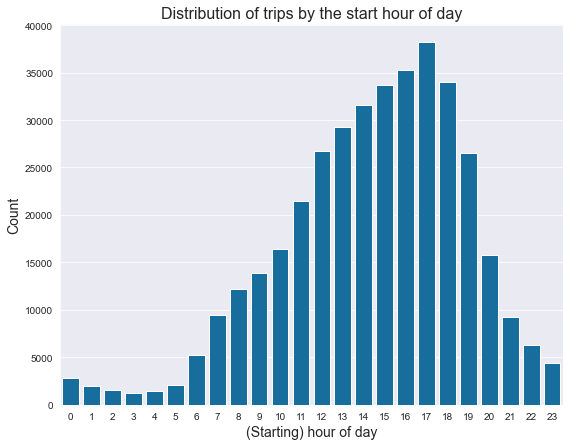

In [319]:
# Visualizing distribution of trips by hours

plt.rcParams['figure.figsize'] = 9, 7
base_color = sns.color_palette('colorblind')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_final, x='hour_of_day', color=base_color)
plt.xlabel('(Starting) hour of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start hour of day", fontsize=16);

### What is monthly trend of number of bike rentals and distribution of weekdays.

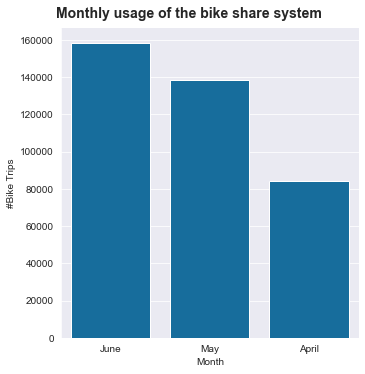

In [320]:
# monthly usege of the bike sharing system
g = sns.catplot(data=df_final, x='month', kind='count', color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.fig.suptitle('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

### Number of bikes rented and duration of trip.

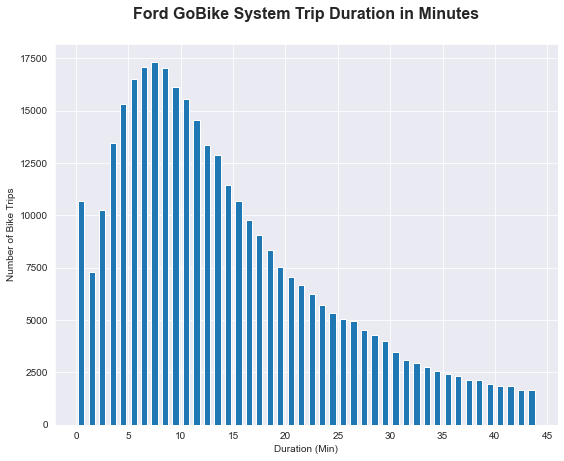

In [321]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_final, x = 'duration', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

### What kind of users do the higest booking of book.

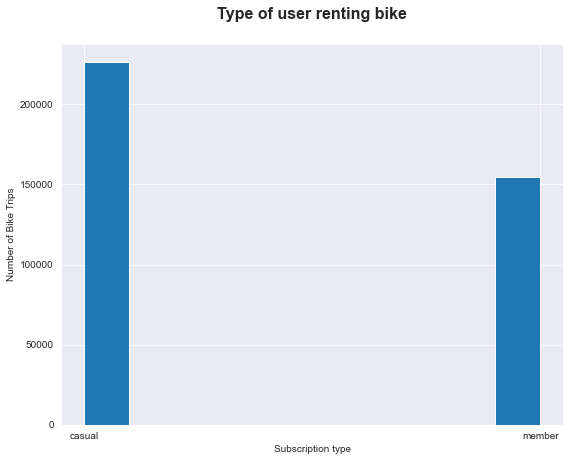

In [322]:
plt.hist(data = df_final, x = 'user_type');
plt.title("Type of user renting bike", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Subscription type')
plt.ylabel('Number of Bike Trips');

### What is weekdays trend of distribution of number of bike rentals.

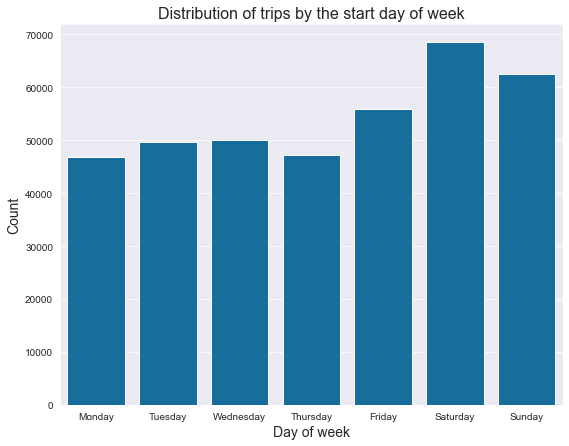

In [323]:
# Visualizing distribution of trips by days

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_final['day_of_week'] = df_final['day_of_week'].astype(weekdaycat)

sns.countplot(data=df_final, x='day_of_week', color=base_color)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week", fontsize=16);

### Bike renting trend during the hour of the day.

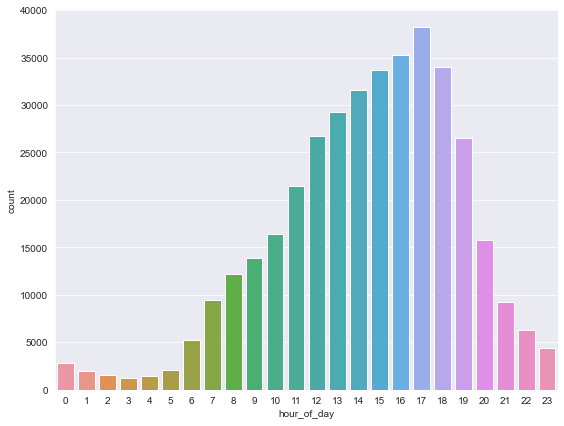

In [324]:
sns.countplot(data = df_final, x = 'hour_of_day');

8:00 AM and 5:00 PM are the two peak hours which have most bikers.

##### Insights from univariate data exploration

1. The most busy hour is `5 PM` , second busy hour is `8AM`. The busy hours are `7-9 AM` in morning and `4PM-6PM` in the evening.
2. On Saturdays and Sundays people tend to use the bike service less
3. Majority of the useres were casuals.
4. Overall, people tend to rent a bike for less than an hour

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. Duration in seconds had a lot of outliers which were trimmed using Z score as the determinant.
2. Duration in minutes also had outliers which is analysis for trips > 77 mins.

#### The features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

One of the most interesting observations was the relationship between user type and hour of the trip. While Subscribers rented it in the mornings and evenings, Customers rented it sporadically, peaking slightly in the afternoon, suggesting that Subscribers used the bikes as a mode of transport for work

# Bivariate Exploration

In [325]:
df_final.user_type.value_counts()

casual    226098
member    154580
Name: user_type, dtype: int64

In [326]:
# Customers vs Subscribers
customer = df_final.query('user_type == "casual"')['ride_id'].count()
subscriber = df_final.query('user_type == "member"')['ride_id'].count()
customer_prop = customer / df_final['ride_id'].count()
subscriber_prop = subscriber / df_final['ride_id'].count()

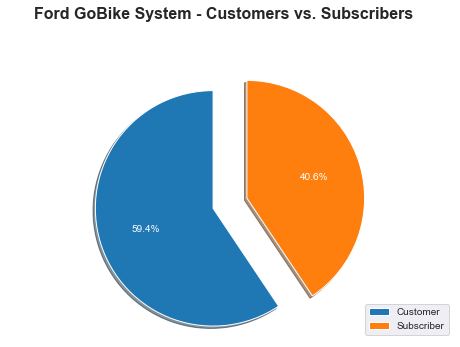

In [327]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')
plt.legend()
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

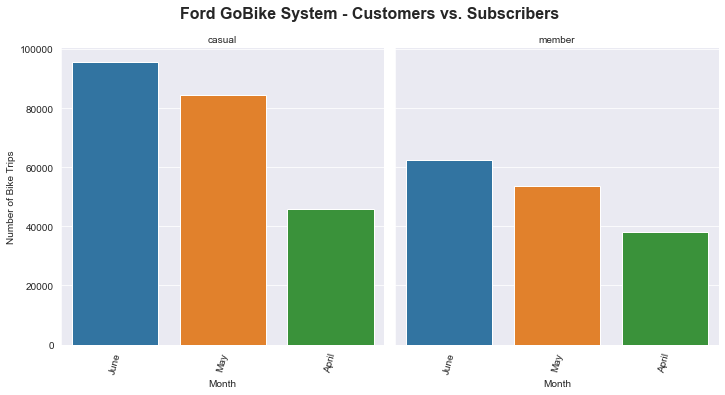

In [328]:
graph = sns.catplot(data=df_final, x='month', col="user_type", kind='count', sharey = True);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

### User type hourly usage

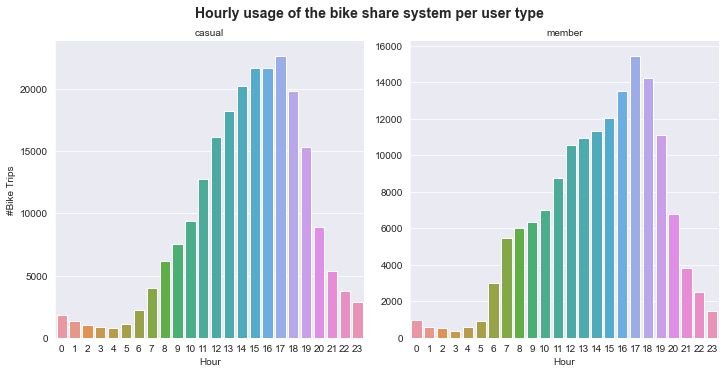

In [329]:
# hourly usege of the bike sharing system per user type

g = sns.catplot(data=df_final, x='hour_of_day', col="user_type", kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

### Trip duration for user type

/Users/karandeepbhardwaj/opt/anaconda3/envs/py3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


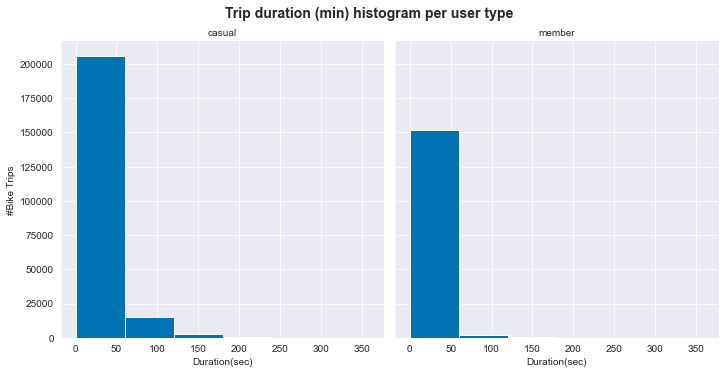

In [330]:
g = sns.FacetGrid(df_final, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 400,60)

g.map(plt.hist, "duration", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration(sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (min) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

#### Does the average duration depend on if a user is a subscriber or customer?

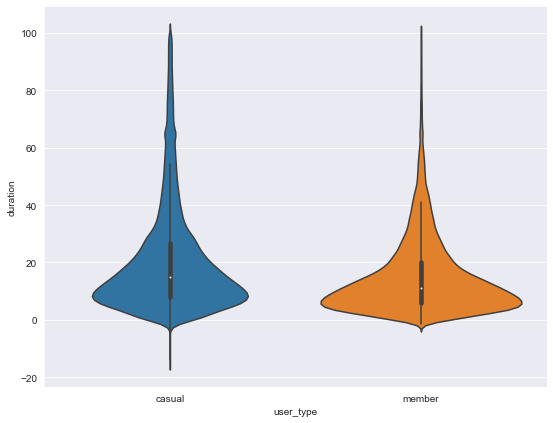

In [331]:
sns.violinplot(data=df_final[df_final.duration<=100],x='user_type',y='duration');

# Multivariate Exploration

In [332]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380678 entries, 0 to 380677
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   ride_id             380678 non-null  object  
 1   started_at          380678 non-null  object  
 2   ended_at            380678 non-null  object  
 3   start_station_name  239969 non-null  object  
 4   start_station_id    239969 non-null  float64 
 5   end_station_name    233788 non-null  object  
 6   end_station_id      233788 non-null  float64 
 7   start_lat           380678 non-null  float64 
 8   start_lng           380678 non-null  float64 
 9   end_lat             380036 non-null  float64 
 10  end_lng             380036 non-null  float64 
 11  user_type           380678 non-null  object  
 12  bike_type           380678 non-null  object  
 13  date                380678 non-null  object  
 14  hour_of_day         380678 non-null  int64   
 15  day_of_week      

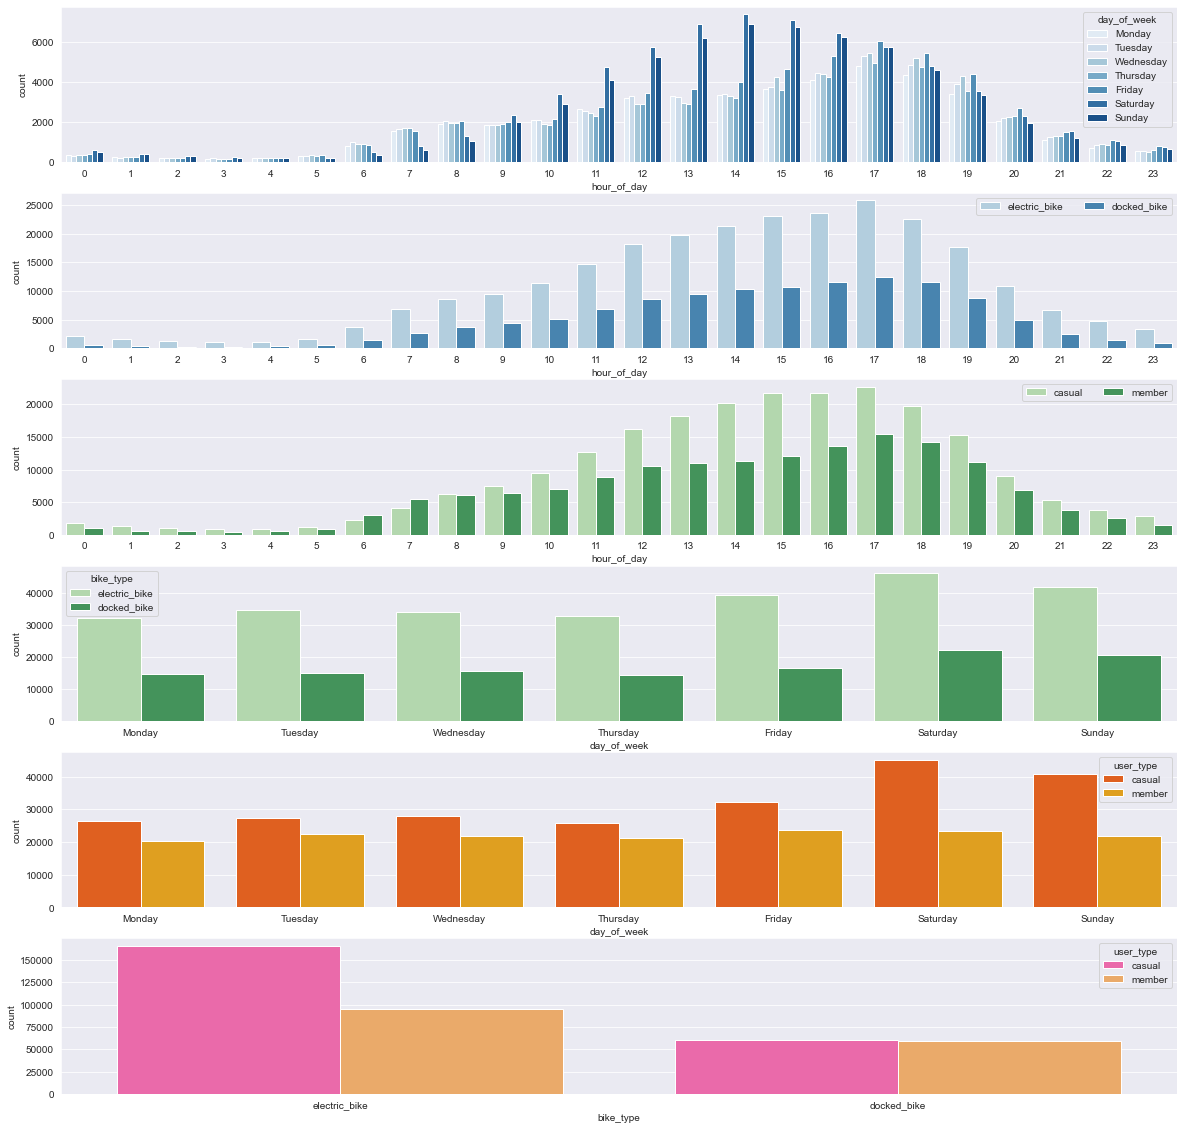

In [335]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sns.countplot(data = df_final, x = 'hour_of_day', hue = 'day_of_week', palette = 'Blues');


ax = plt.subplot(6, 1, 2);
sns.countplot(data = df_final, x = 'hour_of_day', hue = 'bike_type', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping


ax = plt.subplot(6, 1, 3);
sns.countplot(data = df_final, x = 'hour_of_day', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

ax = plt.subplot(6, 1, 4);
sns.countplot(data = df_final, x = 'day_of_week', hue = 'bike_type', palette = 'Greens');

ax = plt.subplot(6, 1, 5);
sns.countplot(data = df_final, x = 'day_of_week', hue = 'user_type', palette = 'autumn');

ax = plt.subplot(6, 1, 6);

sns.countplot(data = df_final, x = 'bike_type', hue = 'user_type', palette = 'spring');

#### Observations from above plots:

1. Saturday, 2:00 PM has the highest biker counts across 7 days, 24 hours.
2. 2:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more electric bikes compared to other hours.
3. 2:00 PM has the most 'Member' bikers compared to other hours. It also has the most 'Casual' bikers compared to other hours.
4. Saturdays has the most Electric bikes compared to other days. It also has the most Docked bikes compared to other days.
5. Saturday has the most 'Member' bikers compared to other days. Saturday has the most 'Casual' bikers compared to other days.
6. Most 'Member' are Electric bike driver. Most 'Casual' bikers are Electric bike driver.

## 2-d bar chart Bike_type vs user_type vs distance

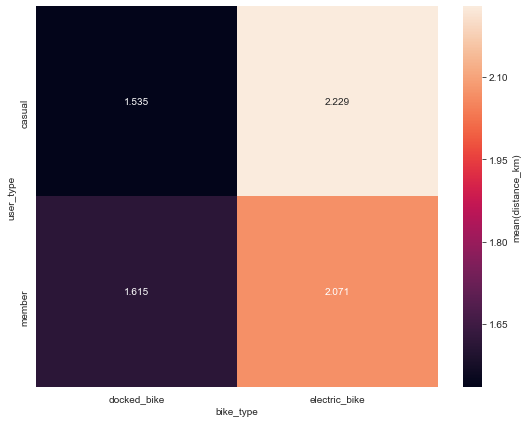

In [336]:
cat_means = df_final.groupby(['bike_type', 'user_type']).mean()['distance_km']
cat_means = cat_means.reset_index(name = 'distance_km')
cat_means = cat_means.pivot(index = 'user_type', columns = 'bike_type',
                            values = 'distance_km')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(distance_km)'});

## 2-d bar chart bike_type vs user_type vs duration

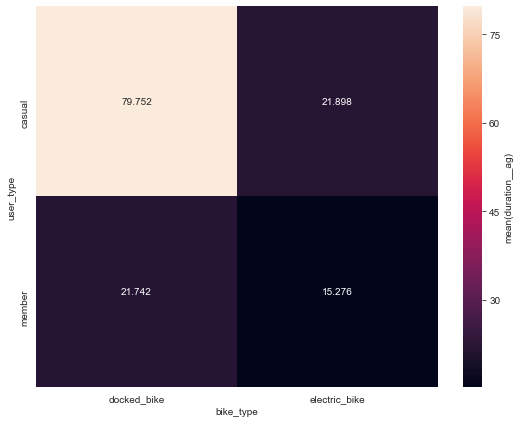

In [337]:
cat_means = df_final.groupby(['bike_type', 'user_type']).mean()['duration']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'bike_type',
                            values = 'duration_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration__ag)'});

* Customers use the bike sharing system more often on weekends:

* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
* weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

* Members use the bike sharing system mainly on weekdays:
* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
* weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, what was previosly not visible.

### Were there any interesting or surprising interactions between features?
For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and the month of the year.As expected, trip data seems to be most during the 9 am to 6 pm timeline, across stations with high traffic.

* Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
* 4:00 AM has least bikers while 2:00 PM has the most bikers.
* Electric bikers bike longer on average compared to Docked bikers.
* 'Casual' bikers bike longer on average compared to 'Member' bikers.
* The bikers are the least in 3:00 AM and 4:00 AM.
* There are less bikers on Saturday and on Sundays on average.